# **Task 2: Predict Future Stock Prices (Short-Term)**


# **Organization: DevelopersHub Corporation**
# **Author:** Hifza Nazir
# **Date:** 10 February 2026

---



# **Step 1: Install and Import Libraries**

In [ ]:
# Installing yfinance library to fetch stock data
!pip install yfinance

# Importing necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("Libraries installed and imported successfully.")

Libraries installed and imported successfully.


# **Step 2: Load Historical Stock Data**

In [ ]:
# Defining the stock symbol and time period
stock_symbol = "AAPL"  # You can change this to 'TSLA' or 'GOOGL'
data = yf.download(stock_symbol, start="2024-01-01", end="2026-02-01")

# Displaying the first few rows
print(f"Historical data for {stock_symbol}:")
display(data.head())

/tmp/ipython-input-974975647.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2024-01-01", end="2026-02-01")
[*********************100%***********************]  1 of 1 completed

Historical data for AAPL:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,183.731323,186.502538,181.999316,185.225793,82488700
2024-01-03,182.355606,183.968852,181.544030,182.325916,58414500
2024-01-04,180.039658,181.207518,179.020249,180.277180,71983600
2024-01-05,179.317139,180.880895,178.317529,180.118823,62379700
2024-01-08,183.652145,183.691743,179.633891,180.217821,59144500


# **Step 3: Feature Selection**

In [ ]:
# Preparing the dataset
# We use today's Open, High, Low, Volume to predict tomorrow's Close
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()

# Creating a target column (Next Day Close)
df['Target_Close'] = df['Close'].shift(-1)

# Removing the last row because it won't have a 'Next Day' value
df.dropna(inplace=True)

# Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target_Close']

print("Features and Target prepared.")

Features and Target prepared.


# **Step 4: Train-Test Split and Model Training**

In [ ]:
# Splitting the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


# **Step 5: Predictions and Visualization**

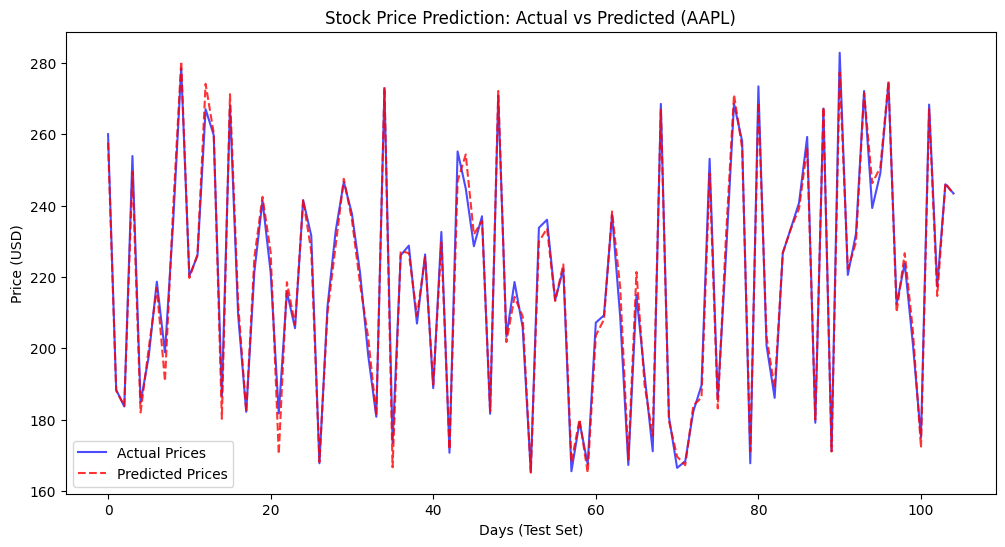

In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted Prices', color='red', linestyle='--', alpha=0.8)
plt.title(f'Stock Price Prediction: Actual vs Predicted ({stock_symbol})')
plt.xlabel('Days (Test Set)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# **Final Insights and Explanation**

# Problem Statement:
The goal of this task was to predict the short-term future closing price of a stock (AAPL) using historical data including Open, High, Low, and Volume.

# Data Preparation:
We used the yfinance library to fetch real-time market data. A 'Target' column was created by shifting the closing price by -1, allowing the model to learn how today's features influence tomorrow's price.

# Model Performance:
We used a Linear Regression model. The visualization shows the comparison between the actual market prices (blue) and the model's predicted prices (red).

# Observations:
1. The model follows the general trend of the stock prices closely.
2. However, since stock prices are influenced by external news and market volatility, there are small gaps between the actual and predicted lines.
3. For a basic regression model, it provides a good baseline for short-term price movements.